# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student.

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Almog B. 5936

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3:


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3:

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
This assignment is classification problem, we will have a wine dataset which
contains 178 instances (178 wines) with each wine described by 13 numerical features, such as alcohol content, phenol levels, color intensity, and more.
The goal of the assignment is to predict the type of wine (class 0,1 or 2) based on the attributes.
</pre>

## Part 2 - Initial Preparations
You could add as many code cells as needed

Loading the data

---



In [1]:
# Here I'll import each module I'll use in this project.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score


Trainset

In [2]:
train_df = pd.read_csv('wine_train.csv')
print("Train Set:")
display(train_df.head())

Train Set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


Testset

In [3]:
test_df = pd.read_csv('wine_test.csv')
print("Test Set:")
display(test_df.head())

Test Set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


EDA

---



Class distribution in the train set-
in this visualization we'll see the distribution of the wine classes in the dataset and check for class imbalance (important for model choice and evaluation metric).

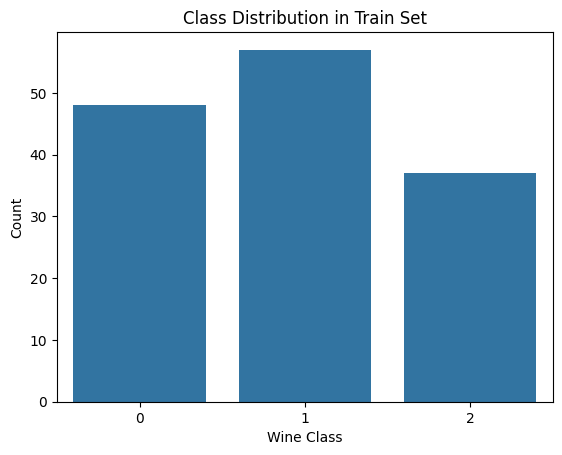

In [4]:
sns.countplot(x='target', data=train_df)
plt.title('Class Distribution in Train Set')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

Correlation heatmap- explore feature relationships, identify redundancy or strong correlations (useful for feature selection or understanding structure).

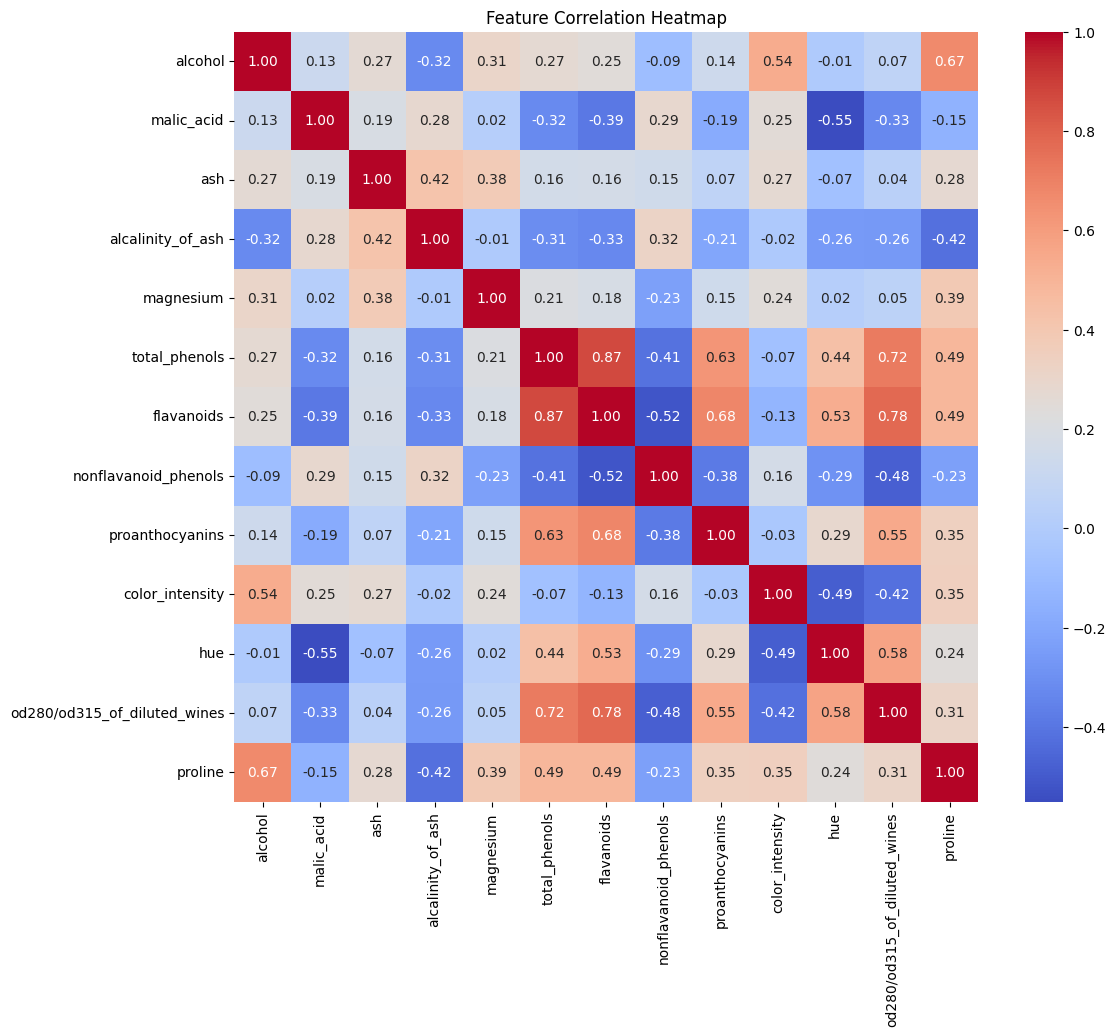

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.drop('target', axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Boxplot of a feature by class- analyze how a single feature varies across wine classes.

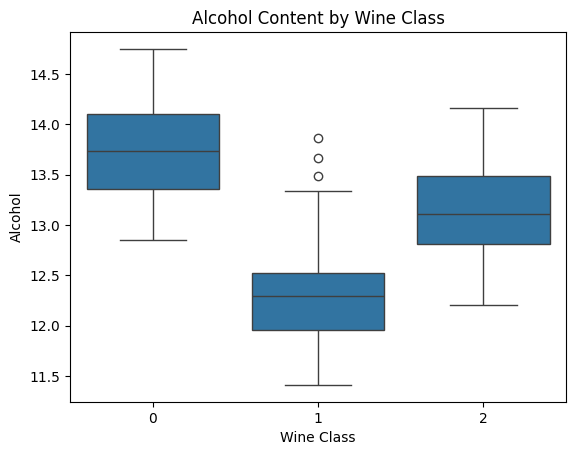

In [6]:
sns.boxplot(x='target', y='alcohol', data=train_df)
plt.title('Alcohol Content by Wine Class')
plt.xlabel('Wine Class')
plt.ylabel('Alcohol')
plt.show()

Pairplot of selected features- visualize relationships between multiple features and how they separate by class. This helps identify clusters and separability between wine types.

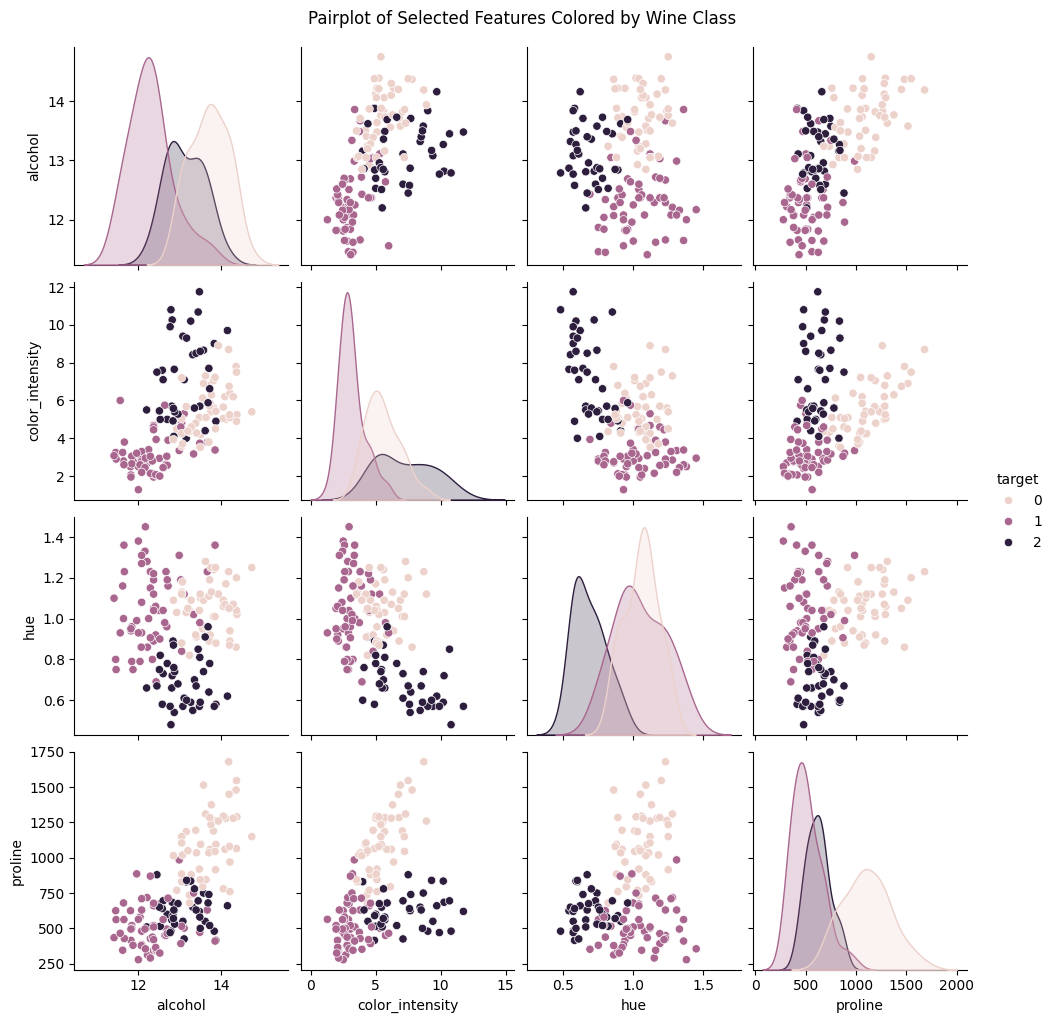

In [7]:
features_to_plot = ['alcohol', 'color_intensity', 'hue', 'proline', 'target']
sns.pairplot(train_df[features_to_plot], hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features Colored by Wine Class', y=1.02)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [8]:
# Split features and target
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

In [9]:
# Define pipeline (covers Sub-Part 2: Feature Engineering)
# Feature engineering and modeling are combined in the pipeline
pipe = Pipeline([
    ('scaler', MinMaxScaler()),  # Feature scaling
    ('pca', PCA()),              # Dimensionality reduction (PCA)
    ('classifier', KNeighborsClassifier())
])

In [10]:
# Define parameter grid (covers Sub-Part 3: Models + Hyperparameters)
# Includes both models and at least 2 hyperparameters for each
param_grid = [
    {
        'pca__n_components': [5, 10, 13],  # Feature engineering: PCA component count
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7]
    },
    {
        'pca__n_components': [5, 10, 13],
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    }
]

In [11]:
# Set up GridSearchCV (covers Sub-Part 1: Cross-Validation with Grid Search)
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='macro'),  # Use macro-average F1
    cv=5,                    # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

In [12]:
# Fit grid search (performs all permutations of feature engineering, model, and hyperparams)
grid_search.fit(X_train, y_train)

# Print best result
print("Best parameters:", grid_search.best_params_)
print("Best macro F1 score:", grid_search.best_score_)

# Summarize all results in a table (required summary for Sub-Part 1)
results_df = pd.DataFrame(grid_search.cv_results_)
display(results_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score'))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 7, 'pca__n_components': 5}
Best macro F1 score: 0.9789682539682539


,params,mean_test_score,rank_test_score
6,"{'classifier': KNeighborsClassifier(), 'classi...",0.978968,1
4,"{'classifier': KNeighborsClassifier(), 'classi...",0.971727,2
0,"{'classifier': KNeighborsClassifier(), 'classi...",0.971580,3
3,"{'classifier': KNeighborsClassifier(), 'classi...",0.964942,4
7,"{'classifier': KNeighborsClassifier(), 'classi...",0.964384,5
8,"{'classifier': KNeighborsClassifier(), 'classi...",0.964384,5
5,"{'classifier': KNeighborsClassifier(), 'classi...",0.957425,7
1,"{'classifier': KNeighborsClassifier(), 'classi...",0.944668,8
9,{'classifier': DecisionTreeClassifier(random_s...,0.943399,9
24,{'classifier': DecisionTreeClassifier(random_s...,0.943399,9


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [13]:
# Extract the best model (already refit by GridSearchCV with refit=True)
final_model = grid_search.best_estimator_

# Refit it explicitly for clarity — not always needed
final_model.fit(X_train, y_train)

# Print a confirmation
print("Final model trained on full training set.")
print("Best pipeline configuration:")
print(grid_search.best_params_)


Final model trained on full training set.
Best pipeline configuration:
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 7, 'pca__n_components': 5}


## Part 5 - Apply on test and show model performance estimation

In [15]:
# Prepare test data
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# 1. Predict using the final model
y_pred = final_model.predict(X_test)

# 2. Show first 5 predictions
print("First 5 predicted labels on test set:", y_pred[:5])

# 3. Evaluate test performance using macro-average F1
test_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-average F1 score on test set:", test_f1)


First 5 predicted labels on test set: [2 0 2 1 2]
Macro-average F1 score on test set: 0.9731615673644658
